In [ ]:
'''
In this project I will be classifying yelp reviews into 1 star or 5 star catagories based off the text
content in the reviews
'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('yelp.csv')

In [10]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [18]:
data['text length'] = data['text'].apply(len)

In [19]:
data.describe()

,stars,cool,useful,funny,text length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


# Exploratory Data Analysis

In [ ]:
import seaborn as sns

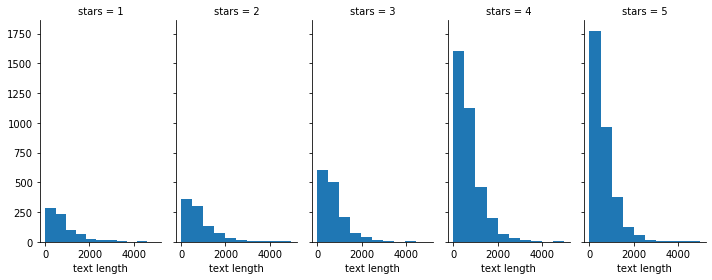

In [25]:
g = sns.FacetGrid(data,col='stars', height=4, aspect=.5)
g= g.map(plt.hist, 'text length')

In [ ]:
'''
The higher the rating, the more reviews are written. Most text length are also left skewed and mostly
nearer to zero than a thousand.it is clear the data is more skewed towards 4 and 5 reviews, which may 
cause issues
'''

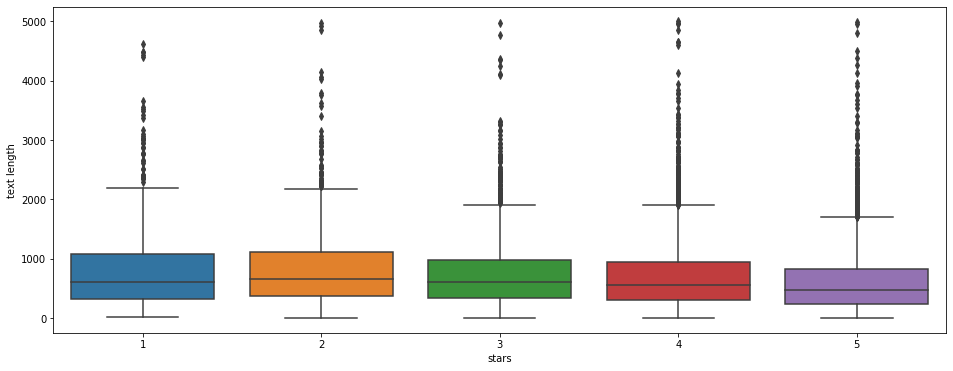

In [35]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=data, x='stars', y='text length')

In [ ]:
'''
The boxplot tells us, even though there are more reviews in 5 star, they have the least amount of text
in there reviews, because they have the lowest mean text length and upper quartile.
They all have high amounts of outliers, which means text length may not give enough information. 
Stars aone and two have the highest amount of text length
'''

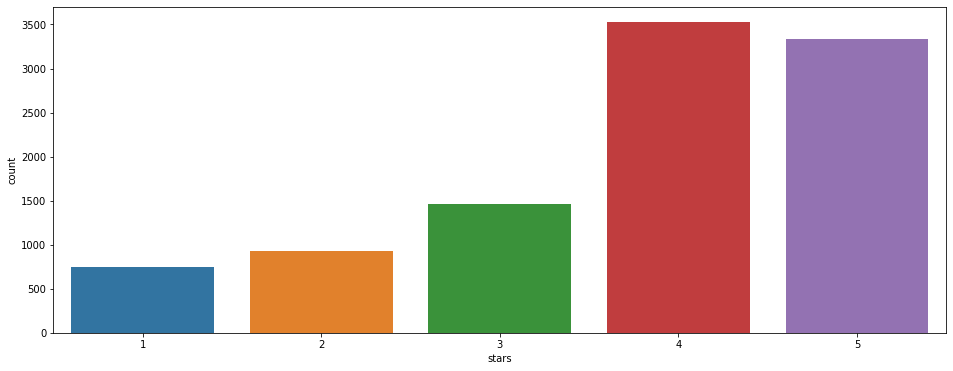

In [38]:
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='stars')

In [39]:
byStars = data.groupby('stars').mean()

In [40]:
byStars
#The funnier, the lower the rating and the more text length in the review.

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [46]:
corr = byStars.corr()

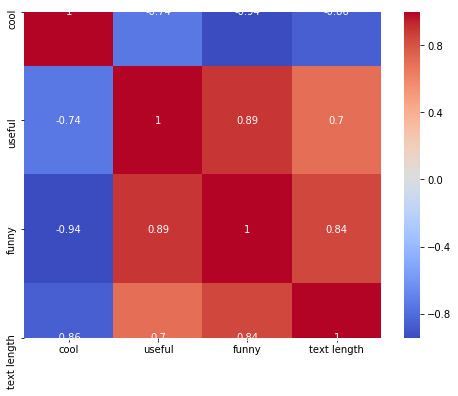

In [124]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data=corr, annot=True, cmap= 'coolwarm')

In [ ]:
## NLP Classification Task

In [64]:
yelp_class = data[(data['stars'] == 1) | (data['stars'] == 5) ]

In [68]:
yelp_class['stars'].nunique()

2

In [129]:
X= yelp_class['text']
y= yelp_class['stars']

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [131]:
countVectorizer = CountVectorizer()

In [132]:
X= countVectorizer.fit_transform(X)

## Train Test Split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

In [134]:
from sklearn.naive_bayes import MultinomialNB

In [135]:
nb = MultinomialNB()

In [136]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [137]:
prediction = nb.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, classification_report

In [143]:
print(confusion_matrix(y_test,prediction))   
print('\n')

print(classification_report(y_test,prediction))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [ ]:
# We can see the MultinomialNB model gave us a 93% accuracy, 
#when predicting the stars ratings based on text data

## Using Text Processing

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer

In [94]:
from sklearn.pipeline import Pipeline

In [158]:
pipeline = Pipeline([
                    ('bow', CountVectorizer()),
                    ('transformer', TfidfTransformer()),
                    ('classifier', MultinomialNB())
                    ])

In [145]:
X= yelp_class['text']
y= yelp_class['stars']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [149]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('transformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [150]:
pred = pipeline.predict(X_test)

In [151]:
print(confusion_matrix(y_test,pred))   
print('\n')

print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Users/kaykay/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
'''
The accuracy has decrease with the text processing mode(TfidfTransformer) compare to the model above.
Maybe adding a custom anakyser can increase the accuracy

'''

In [166]:
import string

In [167]:
from nltk.corpus import stopwords

In [168]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [169]:
pipeline = Pipeline([
                    ('bow', CountVectorizer(analyzer=text_process)),
                    ('transformer', TfidfTransformer()),
                    ('classifier', MultinomialNB())
                    ])

In [171]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a63289050>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('transformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [172]:
pred = pipeline.predict(X_test)

In [173]:
print(confusion_matrix(y_test,pred))   
print('\n')

print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Users/kaykay/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#This model hasn't change the accuracy even with a function that removes stop words and punctuations.